<a href="https://colab.research.google.com/github/NaHyeon1Kim/Modeling/blob/main/Association_rule_mining(apriori).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Association Rule Mining

- **연관규칙분석, 장바구니분석** (Association Rule Analysis, Market Basket Analysis)
  - 비지도학습
  - 고객의 대규모 거래 데이터(트랜잭션)로부터 함께 구매가 발생하는 규칙(예: A -> B)을 도출하여, 고객이 특정 상품 구매 시 이와 연관성 높은 상품을 추천  
  - 거래(transaction)와 항목(item)으로 구성되어 있는 경우  
  - 상품 간의 관련성(방향성)을 고려할 수 있음 => 키워드 간의 관계를 고려하는 데에도 사용  

- 방법
  - Join based: 최소 support threshold 이상인 경우 더 큰 itemset으로 확장
    - Apriori: breadth-first search로 계산이 expensive
  - Tree based: depth-first order을 통해 itemsets를 탐색
  - Pattern growth: 현재 frequent patterns에 기반하여 확장
    - FP-growth: depth-first search로, apriori에 비해 속도가 빠르며 메모리 효율적 사용

- 장점
  - 분석을 위한 복잡한 가정이 필요하지 않으므로 사전 지식이 부족해도 다양한 패턴을 도출 가능
  - 다양한 목적에 맞게 분석을 응용하여 쓸 수 있기 때문에 여러 도메인에서 활용됨

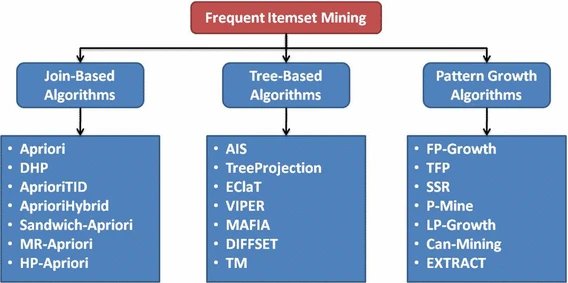

## Step 1. Import the necessary libraries
- `mlxtend`: Machine learning extensions. Machine learning에 사용하는 알고리즘들을 제공하는 파이썬 라이브러리로, 연관규칙 분석 시 사용하는 함수도 포함

In [ ]:
!pip install mlxtend

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Step 2. Import the dataset
- dataset: Chipotle.tsv from [Kaggle](https://www.kaggle.com/navneethc/chipotle)

In [ ]:
import pandas as pd
df = pd.read_csv("chipotle.tsv", delimiter='\t', header=0)
#delimiter : 구분자, header=0 : 첫 번째 줄이 열 이름

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def func1( x ):
  if( x<=0.0):
    return False
  else:
    return True

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head() # 각 order의 내용 (item)에 대한 dataframe
df.groupby(["order_id",
            "item_name" ])["quantity"].sum().unstack().fillna(0).applymap(func1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


item_name,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
order_id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1831,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#data_3.csv를 읽으셔서
# 1. artist 컬럼에 대해서 strip()
# 2. user_id의 dtype을 str
# 3.  userid, artist 를 기준, qty를 value group by, sum()
# 4. 데이터프레임으로 변환, na값은 0을 넣으시고, func1전체 값에다 적용해주세요
# 5. 45분까지 해보세요~
data = pd.read_csv("data_3.csv")
data["user"] = data["user"].astype("str")
data["artist"] = data["artist"].str.strip()
data1 = data.groupby([ "user",
                      "artist"])["qty"].sum().unstack().fillna(0).applymap(func1)
data1.head() #transaction encoding 적용한 결과

artist,...and you will know us by the trail of dead,2pac,3 doors down,30 seconds to mars,311,36 crazyfists,44,50 cent,65daysofstatic,[unknown],...,wilco,within temptation,wolfgang amadeus mozart,wu-tang clan,yann tiersen,yeah yeah yeahs,yellowcard,yo la tengo,zero 7,Édith piaf
user,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1005,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1007,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
tmp1  = apriori( data1, min_support=0.01, use_colnames=True )
tmp1  = fpgrowth( data1, min_support=0.01, use_colnames=True )
#최소 지지도 0.01 이상인 빈번한 항목 집합
#min_support : 항목집합이 빈번하다고 간주할 수 있는 최소 지지도
#use_colnames : 함수가 데이터셋의 열 이름을 항목 집합의 식별자로 사용

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
patterns = association_rules( tmp1, metric='confidence', min_threshold=0.05 )
patterns.sort_values(by='lift', ascending=False).head(3)#lift 기준 내림차순
#min_threshold : 신뢰도의 최소 임계, 규칙의 최소 신뢰도 지정
#'lift'는 규칙의 효과 크기를 나타내며, 항목 간의 양의 관계를 나타낼 때 더 높은 값을 가진다.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
81,(Chips),"(Chicken Bowl, Bottled Water)",0.113413,0.037623,0.015267,0.134615,3.578038,0.01100,1.112080,0.812687
80,"(Chicken Bowl, Bottled Water)",(Chips),0.037623,0.113413,0.015267,0.405797,3.578038,0.01100,1.492061,0.748685
45,(Chips),"(Chicken Bowl, Canned Soft Drink)",0.113413,0.060523,0.019084,0.168269,2.780232,0.01222,1.129544,0.722228


## Step 3. Preprocess the dataset to appropriate form for association rule mining
- `mlxtend`에서 제공하는 [`TransactionEncoder`](http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/)을 사용하여 list 형식으로 구성된 거래 데이터를 2차원 numpy array로 변경  
1) orders로 이루어진 DataFrame을 nested list (장바구니) 형태로 변경
   - order_id가 동일한 item_name을 하나의 리스트로 묶음
   - 이 때, apriori 알고리즘의 정의에 의해, 중복된 연관 규칙은 제거할 필요가 있음

In [ ]:
df_tmp = df.groupby('order_id')['item_name'].apply(set).apply(list).to_list()
print(df_tmp[:10])

[['Izze', 'Nantucket Nectar', 'Chips and Tomatillo-Green Chili Salsa', 'Chips and Fresh Tomato Salsa'], ['Chicken Bowl'], ['Side of Chips', 'Chicken Bowl'], ['Steak Soft Tacos', 'Steak Burrito'], ['Steak Burrito', 'Chips and Guacamole'], ['Chicken Soft Tacos', 'Chicken Crispy Tacos'], ['Chicken Bowl', 'Chips and Guacamole'], ['Chips and Tomatillo-Green Chili Salsa', 'Chicken Burrito'], ['Canned Soda', 'Chicken Burrito'], ['Chicken Bowl', 'Chips and Guacamole']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2) nested list (장바구니)를 association rule을 찾기 위한 dataframe의 형태로 변경
  - Via the fit method, the TransactionEncoder learns the unique labels in the dataset, and via the transform method, it transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array

In [ ]:
te = TransactionEncoder()
te_ary = te.fit_transform(df_tmp) # df_tmp를 장바구니 형태로 변경 (fit과 transform을 동시에 진행)
print(te_ary)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.DataFrame(te_ary, columns=te.columns_) # label 정보는 te.columns_에 저장되어 있으므로, 해당 값을 칼럼명으로 하는 데이터 프레임으로 변경.
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Step 4. Association rule mining
- 연관분석 함수(`apriori, association_rules`)를 사용하여 분석 진행  
  - 지지도(support): 범용성 0.1
    - rule의 조건이 일어날 확률
    - 전체 중에서 상품 A가 몇 번이나 판매되었는가  
  $s(X→Y)=P(X \cap Y)$  

  - 신뢰도(confidence) 0.7
    - rule의 조건이 일어났을 때, 결과가 발생할 확률
    - A를 구입한 주문 중 B도 동시에 구입한 주문 수  
  $c(X → Y)=\frac{P(X \cap Y)}{P(X)}=P(B|A)$  

  - 향상도(lift)
    - 조건과 결과가 각각 독립적이라고 가정할 경우보다 얼마나 더 좋은지를 평가
    - 두 상품의 관계를 직접적으로 나타낸 것  
   $Lift(X, Y)=\frac{P(A \cap B)}{P(A) \times P(B)}=\frac{P(B|A)}{P(B)}$  
    - X가 기본 아이템일 경우 항상 confidence가 1이 나오는 경우 두 아이템 간 관계를 파악할 수 없으므로 향상도를 비교

- 일반적으로 association rule을 사용하여 분석할 때는 다음과 같은 과정을 거침  
    1) 특정 지지도 이상인 set을 찾음  
    2) 해당 set의 조합으로 만들 수 있는 rule 중 신뢰도 이하의 rule을 screening out   
    3) 향상도를 정렬하여 rule을 평가

- 해석 시 유의할 점
  - item의 선/후 혹은 인과 관계는 알 수 없음
  - item별 수량은 고려되지 않음

- Apriori Algorithm 활용
- 빈번하게 발생하는 아이템 셋에 대해서만 계산 (minimum support를 넘지 못하는 아이템을 포함하는 모든 아이템셋은 minimum support를 넘지 못함)
1. Support
- Minimum support를 지정하여, 등장 횟수가 일정 비율 이상의 아이템 set만 선정
  - 1) 각 item들에 대해 지지도를 계산 후 minimum 지지도가 넘는 items를 선정
  - 2) 1에서 구한 items들의 2개 조합으로 구성한 set을 생성 후 지지도 계산 (minimum 이상)
  - 3) 2에서 구한 set들의 조합으로, 3개의 item으로 구성된 항목에 대해 지지도 계산
  - 4) minimum 값을 넘는 조합이 없을 때까지 조합에 포함되는 item 개수를 늘려줌

In [ ]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True) # 여기서는 0.05를 기준으로 선정
frequent_itemsets.sort_values(by='support', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
3,0.335333,(Chicken Bowl)
4,0.266630,(Chicken Burrito)
9,0.258451,(Chips and Guacamole)
12,0.186478,(Steak Burrito)
2,0.150491,(Canned Soft Drink)
7,0.113413,(Chips)
11,0.102508,(Steak Bowl)
0,0.083969,(Bottled Water)
15,0.081243,"(Chips and Guacamole, Chicken Bowl)"
14,0.066521,"(Chips, Chicken Bowl)"


- Chicken Bowl을 주문하는 경우가 많다. (support = 0.335333)
- Chicken Bowl, Chips and Guacamole를 같이 구매한 경우가 많다. (support = 0.081243)

2. Confidence
- 앞서 선정한 items (많이 구매된 메뉴)을 사용하여 함께 구매된 items를 확인
- antecedents (조건절), consequents (결과절): Antecedents를 구매했을 때 consequents를 구매


In [ ]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1).sort_values(by = ['confidence', 'lift', 'support'], ascending=False) # 최소 confidence를 0.1로 지정

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(Chips),(Chicken Bowl),0.113413,0.335333,0.066521,0.586538,1.749124,0.028490,1.607568,0.483072
0,(Canned Soft Drink),(Chicken Bowl),0.150491,0.335333,0.060523,0.402174,1.199328,0.010059,1.111807,0.195642
4,(Chips and Guacamole),(Chicken Bowl),0.258451,0.335333,0.081243,0.314346,0.937416,-0.005424,0.969392,-0.082595
5,(Chicken Bowl),(Chips and Guacamole),0.335333,0.258451,0.081243,0.242276,0.937416,-0.005424,0.978653,-0.091277
7,(Chips and Guacamole),(Chicken Burrito),0.258451,0.266630,0.062159,0.240506,0.902022,-0.006752,0.965603,-0.127764
6,(Chicken Burrito),(Chips and Guacamole),0.266630,0.258451,0.062159,0.233129,0.902022,-0.006752,0.966979,-0.129005
3,(Chicken Bowl),(Chips),0.335333,0.113413,0.066521,0.198374,1.749124,0.028490,1.105985,0.644360
1,(Chicken Bowl),(Canned Soft Drink),0.335333,0.150491,0.060523,0.180488,1.199328,0.010059,1.036604,0.250050


- Chips를 산 사람들 중 Chicken Bowl을 산 경우가 많았다 (Confidence = 0.586538)
- Canned Soft Drink를 산 사람들 중 Chicken Bowl을 산 경우가 많았다 (confidence = 0.402174)
- Chips and Guacamole을 산 사람이 Chicken Bowl을 살 확률 (confidence = 0.314346) > Chicken Bowl을 산 사람이 Chips and Guacamole을 살 확률 (confidence = 0.242276)

3. Lift
- 1보다 클 경우 A를 샀을 때 B을 살 확률이 높아지는 것을 의미
- 1보다 작을 경우 A를 샀을 때 B을 사지 않을 확률이 높은 것을 의미  


In [ ]:
association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values(by = [ 'lift', 'confidence', 'support'], ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(Chips),(Chicken Bowl),0.113413,0.335333,0.066521,0.586538,1.749124,0.028490,1.607568,0.483072
3,(Chicken Bowl),(Chips),0.335333,0.113413,0.066521,0.198374,1.749124,0.028490,1.105985,0.644360
1,(Chicken Bowl),(Canned Soft Drink),0.335333,0.150491,0.060523,0.180488,1.199328,0.010059,1.036604,0.250050
0,(Canned Soft Drink),(Chicken Bowl),0.150491,0.335333,0.060523,0.402174,1.199328,0.010059,1.111807,0.195642


Chips를 주문한 고객이 Chicken bowl을 주문할 확률에는 양의 상관관계가 있음 (lift = 1.749124)

- 지지도, 신뢰도 등의 minimum threshold를 결정할 때 주관성이 들어갈 수 있음
- 목적에 따라 중요하게 판단할 기준이 다를 수 있음
  - 신뢰도가 동일하다고 했을 때, 소비자노출이 중요하다면 지지도가 높은 Rule이, 노출 대비 소비자 반응률(구매여부)이 중요한 경우 향상도가 높은 Rule이 더 좋은 규칙

- 데이터 유형별 AR 적용

In [ ]:
#1. 리스트 형태로 표현된 Transaction 처리
dataset = [['Milk', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt'],
           ['Coke', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Orange', 'Corn', 'Beans', 'Yogurt'],
           ['Corn', 'Cookie', 'Cookie', 'Beans', 'Ice cream', 'Eggs']]

type(dataset)

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
te_ary
df = pd.DataFrame(te_ary, columns=te.columns_)
df

#apriori
#입력: pandas DataFrame, min_support 기본값0.5, use_colnames 기본값 False, max_len 기본값 none

apriori(df, min_support=0.6)
apriori(df, min_support=0.6, use_colnames=True)

frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

#필터링을 위해  length column 추가
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[ (frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.6) ]

#association_rules
#입력: dataframe
#metric: confidence(기본값), lift 등
#min_threshold: 설정된 metric으로 필터링, 0.8(기본값)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)


#결과 중 filtering
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules[ (rules['antecedent_len'] >= 2) & (rules['confidence'] > 0.75) & (rules['lift'] > 1.2) ]


#-----------------------------------------------------#
#2. csv/엑셀로 부터 transaction 읽은 후 association rule
#출처: UCI machine learning databases
df = pd.read_excel('OnlineRetail2.xlsx')
df.head()

#자료 정리
df['Description'] = df['Description'].str.strip()	#Description 컬럼의 문자열 전후 공백 정리
df['InvoiceNo'] = df['InvoiceNo'].astype('str')		#InvoiceNo을 문자열로 변경
df = df[~df['InvoiceNo'].str.contains('C')]		#InvoiceNo 중 정상적이지 않은 거래 건(C문자 포함 거래) 제외

#apriori에 적용할 데이터 형태로 변경
basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
# 두 컬럼을 기준으로 Quantity값을 정리/ 합계구하고, 형태 변환 / index새로 생성/NaN값은0변환 / InvoiceNo으로 index 설정

#다른 방식으로 처리
#df.drop_duplicates('InvoiceNo', inplace=True)
#df.pivot(index="InvoiceNo", columns="Description", values="Quantity").fillna(0)

#binarize
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

type(basket)

#전체 자료에 함수 적용
basket_sets = basket.applymap(encode_units)
basket_sets.columns

#불필요한 컬럼 제거
basket_sets.drop('POSTAGE', inplace=True, axis=1)
basket_sets.drop('amazon', inplace=True, axis=1)
basket_sets.drop('check', inplace=True, axis=1)
basket_sets.drop('faulty', inplace=True, axis=1)
basket_sets.drop('damages', inplace=True, axis=1)
type(basket_sets)


#apriori
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.1) ]

#-----------------------------------------------------#
# 3. 음악 콘텐츠 관련 Transaction 처리
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd

df = pd.read_csv('data_3.csv')
df.head()

df['artist'] = df['artist'].str.strip()
df.dropna(axis=0, subset=['user'], inplace=True)
df['user'] = df['user'].astype('str')

basket=df.groupby(['user', 'artist'])['qty'].sum().unstack().reset_index().fillna(0).set_index('user')

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.columns

frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.1) ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(radiohead),(coldplay),0.201780,0.149357,0.065282,0.323529,2.166147,0.035145,1.257472,0.674440
1,(coldplay),(radiohead),0.149357,0.201780,0.065282,0.437086,2.166147,0.035145,1.418014,0.632875
2,(the beatles),(radiohead),0.190900,0.201780,0.071217,0.373057,1.848827,0.032697,1.273193,0.567441
3,(radiohead),(the beatles),0.201780,0.190900,0.071217,0.352941,1.848827,0.032697,1.250427,0.575176
